# CCT College Dublin 

## Module Title: 
Machine Learning for AI
## Assessment Title
ML_CA2
## Lecturer Name:
David McQuaid
## Student Full Name/ID:
Heber Junio Dos Anjos Mota – 2020317
## Assessment Due Date:
31th May 2024


### Declaration 			
By submitting this assessment, I confirm that I have read the CCT policy on Academic Misconduct and understand the implications of submitting work that is not my own or does not appropriately reference material taken from a third party or other source. I declare it to be my own work and that all material from third parties has been appropriately referenced. I further confirm that this work has not previously been submitted for assessment by myself or someone else in CCT College Dublin or any other higher education institution.

### Github Link
https://github.com/heberjuunior/Heber_ML_CA2

In [14]:
# Importing Libraries
import  pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Neural Networks
## Data UnderstandingIn the initial phase of this project, we will begin by understanding the provided dataset. This involves gaining insights into the structure and features of the data.ng
We start by loading the dataset. Using the "pd.read_csv" function, we read the "BankRecords.csv" file into a dataframe. Following this, we use the "display()" function to get a preview of the dataset.set.

In [2]:
df = pd.read_csv("BankRecords.csv")
display(df)

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,Masters,0,No,No,No,Yes,No
4996,4997,30,4,15,92037,4,0.4,Diploma,85,No,No,No,Yes,No
4997,4998,63,39,24,93023,2,0.3,Masters,0,No,No,No,No,No
4998,4999,65,40,49,90034,3,0.5,Degree,0,No,No,No,Yes,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands's)    5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 547.0+ 

The information above indicates that the dataset includes:

14 columns and 5000 rows, 8 numerical variables and 6 categorical variables.

In [4]:
df.nunique()

ID                       5000
Age                        45
Experience(Years)          47
Income(Thousands's)       162
Sort Code                 467
Family                      4
Credit Score              108
Education                   3
Mortgage(Thousands's)     347
Personal Loan               2
Securities Account          2
CD Account                  2
Online Banking              2
CreditCard                  2
dtype: int64

In [5]:
summary_stats = df.describe()
display(summary_stats)

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Mortgage(Thousands's)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,56.498800
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,101.713802
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000


From the statistical values provided, we can observe the following:

-The "experience" variable has a minimum value of "-3," which is not possible.

-The "age" and "income" variables show significant variance.

-The "mortgage" variable has a high standard deviation and mean difference, with most customers not having a mortgage, as indicated by the 25th and median percentiles at 0 and the 75th percentile at 101. This suggests further analysis could be done on the age range of customers with mortgages.

In [6]:
summary_stats_cat = df.describe(include='object')
display(summary_stats_cat)

,Education,Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
count,5000,5000,5000,5000,5000,5000
unique,3,2,2,2,2,2
top,Diploma,No,No,No,Yes,No
freq,2096,4520,4478,4698,2984,3530



From the data, we can see that:

Variables have 2 to 3 unique entries, aiding the encoding process.
The "top" category shows the most frequent outcomes.
Most customers do not have a personal loan or credit card, as "NO" is highly frequent.

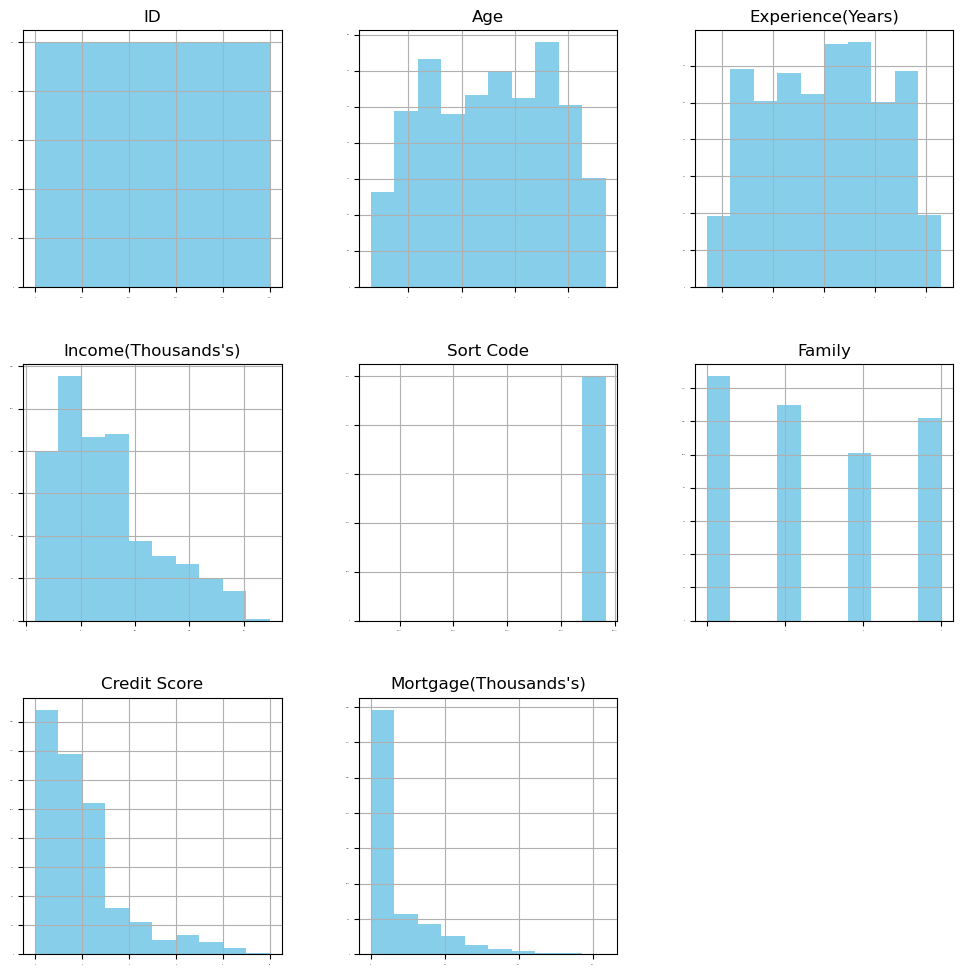

In [7]:
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12, 12), color='skyblue')
plt.show()

We won't evaluate the ID and Sort Code graphs since they are unique identifiers, with the sort code identifying the bank branch.

The histograms show that age and experience are symmetric, while income, credit score, and mortgage are right-skewed.

# Data Preparation
Now, I'll assess the data quality by identifying missing values, outliers, and handling categorical variables.

In [8]:
missing_values = df.isnull().any()
display(missing_values)

ID                       False
Age                      False
Experience(Years)        False
Income(Thousands's)      False
Sort Code                False
Family                   False
Credit Score             False
Education                False
Mortgage(Thousands's)    False
Personal Loan            False
Securities Account       False
CD Account               False
Online Banking           False
CreditCard               False
dtype: bool

Firstly, the dataset shows no missing values. Next, we'll check for negative values.



In [9]:
negative_vals = (df.select_dtypes(include=[float, int]) < 0).sum()
display(negative_vals)

ID                        0
Age                       0
Experience(Years)        52
Income(Thousands's)       0
Sort Code                 0
Family                    0
Credit Score              0
Mortgage(Thousands's)     0
dtype: int64

We've found 52 negative values in the "Experience (Years)" variable, which is impossible since years of experience can't be negative. To address this, we'll replace these negative values with their absolute counterparts.


In [10]:
df['Experience(Years)'] = df['Experience(Years)'].abs()

In [11]:
negative_vals_updated = (df.select_dtypes(include=[float, int]) < 0).sum()
display(negative_vals_updated)

ID                       0
Age                      0
Experience(Years)        0
Income(Thousands's)      0
Sort Code                0
Family                   0
Credit Score             0
Mortgage(Thousands's)    0
dtype: int64

Additionally, we'll look at the count of zero values in each column.







In [12]:
zero_values = (df == 0).sum()
display(zero_values)

ID                          0
Age                         0
Experience(Years)          66
Income(Thousands's)         0
Sort Code                   0
Family                      0
Credit Score              106
Education                   0
Mortgage(Thousands's)    3462
Personal Loan               0
Securities Account          0
CD Account                  0
Online Banking              0
CreditCard                  0
dtype: int64

.

# Handling Outliers
In this step, we'll look for and address the outliers. We'll exclude the "Sort Code" and "ID" columns from this process.

In [13]:
# Selecting columns for outlier detection
outliers_col = df[["Age", "Experience(Years)", "Income(Thousands's)", "Family", "Credit Score", "Mortgage(Thousands's)"]] 

# Defining quartiles 
Q1 = outliers_col.quantile(0.25)
Q3 = outliers_col.quantile(0.75)
IQR = Q3 - Q1

# Setting the threshold for outliers
threshold = 1.5
outliers = (outliers_col < (Q1 - threshold * IQR)) | (outliers_col > (Q3 + threshold * IQR))

# Counting the number of outliers in each column
outliers_count = outliers.sum()
print("Number of outliers in each column:")
print(outliers_count)

Number of outliers in each column:
Age                        0
Experience(Years)          0
Income(Thousands's)       96
Family                     0
Credit Score             324
Mortgage(Thousands's)    291
dtype: int64


We'll handle outliers differently for each variable based on their significance to our analysis. In the case of the "Mortgage" variable, outliers could be useful noise in our dataset because not everyone has a mortgage. Therefore, for now, we won't handle them and will observe how they interact with our models before making any changes.

## Encoding
In this step, I'll encode my categorical variables. Based on the observations, the "Personal Loan," "Securities Account," "CD Account," "Online Banking," and "CreditCard" columns are binary, with values either "Yes" or "No." I'll perform label encoding by replacing "No" with 0 and "Yes" with 1.

In [15]:
label_encoder = LabelEncoder()

# Encoding categorical variables
for column in ["Personal Loan", "Securities Account", "CD Account", "Online Banking", "CreditCard"]:
    df[column] = label_encoder.fit_transform(df[column])
display(df)

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,Diploma,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,Diploma,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,Degree,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,Degree,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,Masters,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,Diploma,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,Masters,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,Degree,0,0,0,0,1,0


During dataset exploration, we found that the "Education" variable contained three unique values: "Diploma," "Degree," and "Masters." We can observe a hierarchy in these values (where "Masters" is higher than "Degree," and "Degree" is higher than "Diploma"). To encode this hierarchy while minimizing sparse data, we'll assign numerical weights to each category using ordinal encoding.

In [16]:
# Encoding education level
education_encoding = {'Diploma': 1, 'Degree': 2, 'Masters': 3}
df['Education'] = df['Education'].map(education_encoding)
display(df)

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


1.598456618050722


2.1040023191079444


.